In [ ]:
!pip install -U finance-datareader

In [13]:
!pip install webdriver-manager

In [15]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager



In [4]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

In [5]:
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [6]:
stocklst = fdr.StockListing('KRX')  # stocklst = 한국 전체 주식

In [7]:
stocklst.head(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [8]:
company_lst = ['신일전자',
'파세코',
'에스씨디',
'빙그레',
'위닉스',
'태경케미컬',
'위니아딤채',
'에스피지',
'롯데하이마트',
'비엠티',
]
print(len(company_lst))
company_lst



10


['신일전자',
 '파세코',
 '에스씨디',
 '빙그레',
 '위닉스',
 '태경케미컬',
 '위니아딤채',
 '에스피지',
 '롯데하이마트',
 '비엠티']

In [9]:
codes = stocklst[stocklst.Name.apply(lambda stock: stock in company_lst)].Symbol.to_list()  #Symbol = 코드
len(codes) # codes 의 길이가 company lst 의 길이가 같아야 정상적으로 나온거임 
codes

['071840',
 '086670',
 '005180',
 '002700',
 '042110',
 '058610',
 '071460',
 '044340',
 '006890',
 '037070']

In [20]:
# 회사별 정보 모으기

driver = webdriver.Chrome(ChromeDriverManager().install())

for code in codes:
    df = fdr.DataReader(code,'2018-07-23', '2018-07-30')
    
    
    #기준시점 시가 총액
    price1 = df.loc['2018-07-10']['Close']
    
    url1 = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver.get(url1)
    time.sleep(0.5)
    html1 = driver.page_source
    df1 = pd.read_html(html1)[1]
   
    # 발행 주식수
    outstanding = df1.iloc[6][1].split('/')[0]
    outstanding = outstanding.replace('주','') # 1,231,000주 -> 1,231,000
    outstanding = outstanding.replace(',', '') # 1,231,000 -> 1231000
    outstanding =  float(outstanding)
    print("발행 주식수: ",outstanding)
    
    # 유동비율 
    floating = df1.iloc[6][1].split('/')[1]
    floating = floating.replace('%', '')  # %기호 없애주기
    floating = float(floating)
    print("유동비율: ",floating)
    
     #액면가
    price_f = df1.iloc[2][1]
    price_f = price_f.replace('원', '') # 5,000원 -> 5,000
    price_f = price_f.replace(',', '') # 5,000 -> 5000
    price_f = int(price_f)
    print("액면가: ", price_f)

    # 기준시점 시가총액( 기준시점주가 * 발행주식수 * 유동비율)
    marketcap_1 = price1 * outstanding * floating

    print("시가총액: ",marketcap_1)
    



====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sim\.wdm\drivers\chromedriver\win32\99.0.4844.51]
C:\Users\sim\AppData\Local\Temp/ipykernel_12868/3597287852.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


KeyError: '2018-07-10'

In [31]:
# 모든 주가 데이터
# for code in codes:
#     df_stk = pd.concat([fdr.DataReader(code,'2017-02-10', '2022-02-10').assign(stock_code = code)])
# df_stk

# 하나의 기업 주가 데이터
# code = '078930'
# df = fdr.DataReader(code,'2017-02-10', '2022-02-10')
# df


In [ ]:
# 지수 구하기
# 해야할것 
# 날짜별 비교시점 시가총액합/ 기준시점시가총액 합
# 정유주 별 지수
# 윤활유주 지수
# 석유화학주 지수
# 전체지수


In [ ]:
#주가 딕셔너리에 넣기-> 유가,개별 주식간 비교에 사용

price_history = dict()

for code in codes:
    df = fdr.DataReader(code,'2017-02-10', '2022-02-10')
    price_history[code]= df['Close']   # 회사코드: [과거주가 리스트] 
 
    
df_history = pd.DataFrame(price_history)
df_history


In [ ]:
# Oil 지수 구하기 

driver = webdriver.Chrome()

marketcap = dict()

for code in codes:
    print(code)
    df = fdr.DataReader(code,'2017-02-10', '2022-02-10')
    
    
    #기준시점 시가 총액
    price1 = df.loc['2017-02-10']['Close']
    
    url1 = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver.get(url1)
    time.sleep(0.5)
    html1 = driver.page_source
    df1 = pd.read_html(html1)[1]
   
    # 발행 주식수
    outstanding = df1.iloc[6][1].split('/')[0]
    outstanding = outstanding.replace('주','') # 1,231,000주 -> 1,231,000
    outstanding = outstanding.replace(',', '') # 1,231,000 -> 1231000
    outstanding =  float(outstanding)
    print("발행 주식수: ",outstanding)
    
    # 유동비율 
    floating = df1.iloc[6][1].split('/')[1]
    floating = floating.replace('%', '')  # %기호 없애주기
    floating = float(floating)
    print("유동비율: ",floating)
    
     #액면가
    price_f = df1.iloc[2][1]
    price_f = price_f.replace('원', '') # 5,000원 -> 5,000
    price_f = price_f.replace(',', '') # 5,000 -> 5000
    price_f = int(price_f)
    print("액면가: ", price_f)
    print('-'* 50)
    
    ## 지수 구하기
    
    # 기업들의 주가 데이터프레임: df_p
    df_p = fdr.DataReader(code,'2017-02-10', '2022-02-10')
    
    #비교시점의 시가총액(비교시점주가 * 발행주식수 * 유동비율)
    
    if price_f == 5000:     #액면금액이 5000원
        pass
    elif price_f == 2500:   #액면금액이 2500원
        df_p['Close'] = df_p['Close']/2
        
    elif price_f == 500:    #액면금액이 500원
        df_p['Close'] = df_p['Close']/10
        
    elif price_f == 100:    #액면금액이 100원
        df_p['Close'] = df_p['Close']/50
        
   
    marketcap[code] = df_p['Close'] * outstanding * floating   # 딕셔너리에 추가
   
 
df_marketcap = pd.DataFrame(marketcap)
df_marketcap['total'] = df_marketcap.sum(axis=1)

# 기준시점(2017년 2월 10일) 시가총액( 기준시점주가 * 발행주식수 * 유동비율)

marketcap_std = df_marketcap['total'].iloc[0]

# 지수 = (각기업시가총액합 / 2017년 2월10일의 각 기업시가총액합) * 100
df_marketcap['지수'] = (df_marketcap['total']/ marketcap_std) * 100

df_marketcap

## 시각화

In [ ]:
!pip install plotly 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# x축 index값 못 읽음
# px.line(df_marketcap, x='Date', y='지수')


In [ ]:
# x축 index값 못 읽음: reset_index 사용
df1_marketcap = df_marketcap.reset_index()
px.line(df1_marketcap, x='Date', y='지수')

In [ ]:
# 유가데이터 가져오기

df_op = pd.read_csv('daum_oil.csv')
df_op.head(3)

In [ ]:
# 유가, 정유주 지수 그래프 비교-> 그래프 합쳐야함
# 열 이름 date-> Date 로 맞춰주기

df_op = df_op.rename(columns={'date':'Date'})
df_op.head(2)

In [ ]:
df_op.info() # 날짜 object타입

In [ ]:
df_op['Date'] = pd.to_datetime(df_op['Date'])
df_op.info()

In [ ]:
# 유가 중 두바이유만 추출

df_dop= df_op[df_op['company']=='두바이유선물']
df_dop.head(3)

In [ ]:
df1_marketcap.info()

In [ ]:
df_merge = pd.merge(df1_marketcap, df_dop)
df_merge.head()

In [ ]:
## 두바이유가, 정유주 지수 그래프 비교

px.line(df_merge, x='Date', y=['지수', '종가'])

In [ ]:
# for code in codes:
#     df_stk = pd.concat([fdr.DataReader(code,'2018-07-01', '2018-07-30').assign(stock_code = code)])
# df_stk
# '071840',
#  '086670',
#  '005180',
#  '002700',
#  '042110',
#  '058610',
#  '071460',
#  '044340',
#  '006890',
#  '037070'

df = fdr.DataReader('071840','2018-07-01', '2018-07-30')

In [33]:
df['Close'] = df['Close'].astype(int)

<AxesSubplot:xlabel='Date'>

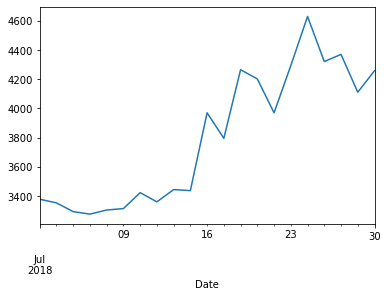

In [34]:
df['Close'].plot()

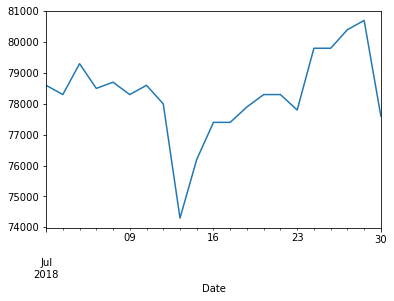

In [40]:
df = fdr.DataReader('071840','2018-07-01', '2018-07-30')
df['Close'] = df['Close'].astype(int)
df['Close'].plot()

In [43]:
df = fdr.DataReader('086670','2018-07-01', '2018-07-30')
df['Close'] = df['Close'].astype(int)
df['Close'].plot 

In [44]:
df = fdr.DataReader('005180','2018-07-01', '2018-07-30')
df['Close'] = df['Close'].astype(int)
df['Close'].plot 

In [41]:
df = fdr.DataReader('002700','2018-07-01', '2018-07-30')
df['Close'] = df['Close'].astype(int)
df['Close'].plot 

In [42]:
df = fdr.DataReader('042110','2018-07-01', '2018-07-30')
df['Close'] = df['Close'].astype(int)
df['Close'].plot 

<AxesSubplot:xlabel='Date'>

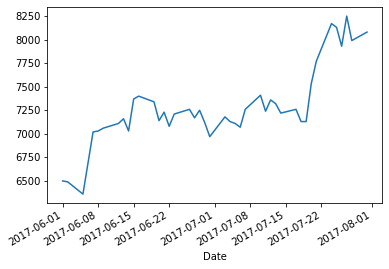

In [45]:
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('060150','2017','2018').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()

In [48]:
company_lst=['뉴보텍', '동양철관', '뉴로스', '자연과환경', '웰크론한텍']
codes_jang = stocklst[stocklst.Name.apply(lambda stock: stock in company_lst)].Symbol.to_list()

In [47]:
codes_jang

['126870', '060260', '008970', '076080', '043910']

<AxesSubplot:xlabel='Date'>

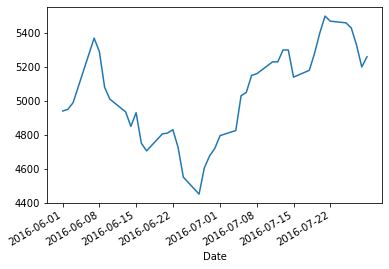

In [56]:
#뉴보텍
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('126870','2016','2017').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

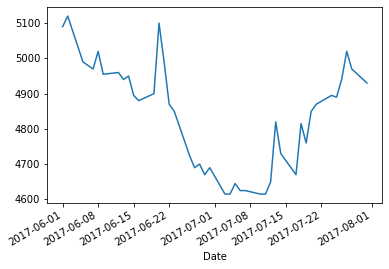

In [58]:
#뉴보텍
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('126870','2017','2018').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

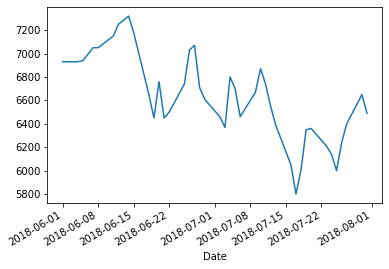

In [57]:
#뉴보텍
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('126870','2018','2019').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

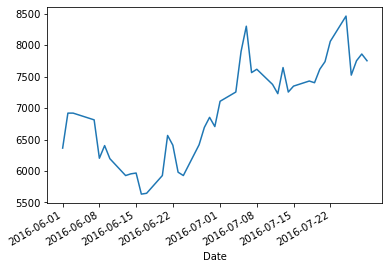

In [62]:
# 동양철관 
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('060260','2016','2017').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

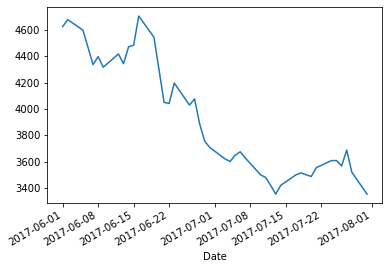

In [63]:
#동양철관
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('060260','2017','2018').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

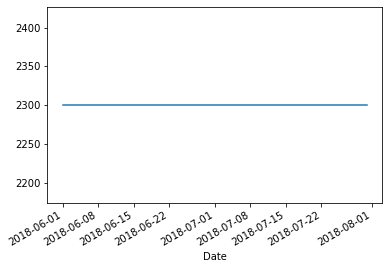

In [64]:
#동양철관
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('060260','2018','2019').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

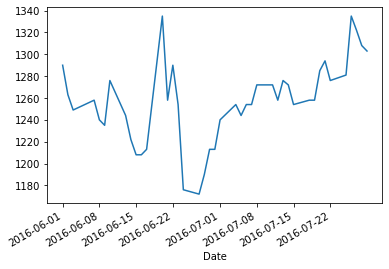

In [65]:
#뉴로스
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('008970','2016','2017').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

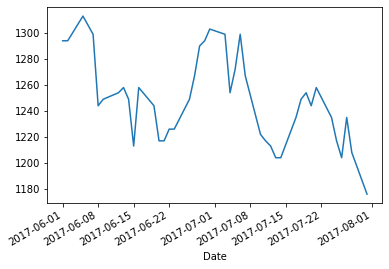

In [66]:
#뉴로스
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('008970','2017','2018').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

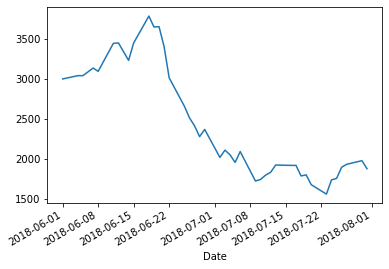

In [67]:
#뉴로스
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('008970','2018','2019').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

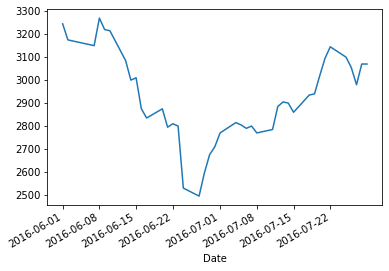

In [68]:
#자연과환경
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('076080','2016','2017').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

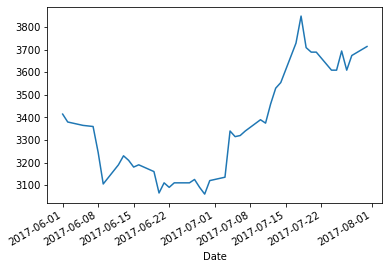

In [69]:
#자연과환경
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('076080','2017','2018').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

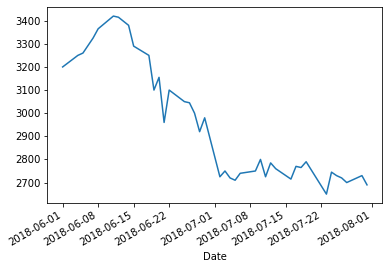

In [70]:
#자연과환경
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('076080','2018','2019').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

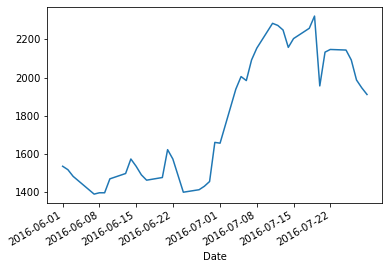

In [71]:
#웰크론한텍
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('043910','2016','2017').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

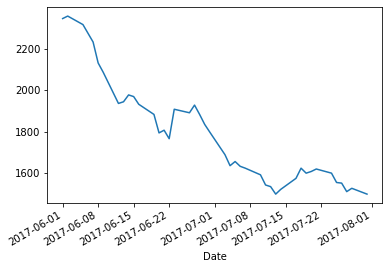

In [72]:
#웰크론한텍
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('043910','2017','2018').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()


<AxesSubplot:xlabel='Date'>

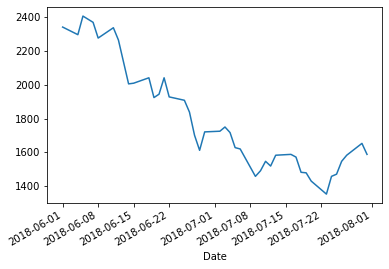

In [73]:
#웰크론한텍
df_stock = pd.DataFrame()
for i in range(6,8):
    df_stock_a = fdr.DataReader('043910','2018','2019').query(('Date.dt.month == {}'.format(i)))
    df_stock = pd.concat([df_stock, df_stock_a])
# df_stock
df_stock['Close'].plot()
